<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sonar-Data-Classification" data-toc-modified-id="Sonar-Data-Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sonar Data Classification</a></span></li><li><span><a href="#Load-libraries-and-data" data-toc-modified-id="Load-libraries-and-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load libraries and data</a></span></li><li><span><a href="#Helper-functions" data-toc-modified-id="Helper-functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Helper functions</a></span></li><li><span><a href="#Inspect-and-visualize-the-data" data-toc-modified-id="Inspect-and-visualize-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Inspect and visualize the data</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Visualizations</a></span></li></ul></li><li><span><a href="#Model-the-data" data-toc-modified-id="Model-the-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model the data</a></span><ul class="toc-item"><li><span><a href="#Create-validation-data-set" data-toc-modified-id="Create-validation-data-set-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Create validation data set</a></span></li><li><span><a href="#Build-models" data-toc-modified-id="Build-models-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Build models</a></span><ul class="toc-item"><li><span><a href="#Initial-pass" data-toc-modified-id="Initial-pass-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Initial pass</a></span><ul class="toc-item"><li><span><a href="#Data-standardization" data-toc-modified-id="Data-standardization-5.2.1.1"><span class="toc-item-num">5.2.1.1&nbsp;&nbsp;</span>Data standardization</a></span></li><li><span><a href="#Model-tuning-helper-function" data-toc-modified-id="Model-tuning-helper-function-5.2.1.2"><span class="toc-item-num">5.2.1.2&nbsp;&nbsp;</span>Model tuning helper function</a></span></li><li><span><a href="#SVM-tuning" data-toc-modified-id="SVM-tuning-5.2.1.3"><span class="toc-item-num">5.2.1.3&nbsp;&nbsp;</span>SVM tuning</a></span></li><li><span><a href="#LR-tuning" data-toc-modified-id="LR-tuning-5.2.1.4"><span class="toc-item-num">5.2.1.4&nbsp;&nbsp;</span>LR tuning</a></span></li><li><span><a href="#KNN-tuning" data-toc-modified-id="KNN-tuning-5.2.1.5"><span class="toc-item-num">5.2.1.5&nbsp;&nbsp;</span>KNN tuning</a></span></li></ul></li><li><span><a href="#Initial-pass---Ensemble-methods" data-toc-modified-id="Initial-pass---Ensemble-methods-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Initial pass - Ensemble methods</a></span><ul class="toc-item"><li><span><a href="#Best-model-hyperparameter-tuning" data-toc-modified-id="Best-model-hyperparameter-tuning-5.2.2.1"><span class="toc-item-num">5.2.2.1&nbsp;&nbsp;</span>Best model hyperparameter tuning</a></span></li></ul></li></ul></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Predictions</a></span><ul class="toc-item"><li><span><a href="#GBM" data-toc-modified-id="GBM-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>GBM</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>SVM</a></span></li></ul></li></ul></li></ul></div>

<h1>Sonar Data Classification</h1>

<img style="float: left; margin-right: 15px; width: 40%; height: 40%; " src="images/sonar.jpg" />

Dataset source:  [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

# Load libraries and data

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load libraries
import os

import numpy as np

from matplotlib import pyplot

from pandas import read_csv
from pandas import set_option
from pandas import DataFrame
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
dataFile = os.path.join(".", "datasets", "sonar.all-data.csv")
data = read_csv(dataFile, header = None)

# Helper functions

In [4]:
def corrTableColors(value):
    color = 'black'

    if value == 1:
        color = 'white'
    elif value < -0.7:
        color = 'red'
    elif value > 0.7:
        color = 'green'

    return 'color: %s' % color

In [5]:
def makeRange(start, stop, step, multi, dec):
    vals = []
    for i in range(start, stop, step):
        vals.append(np.round(multi * i, decimals = dec))
        
    return vals

# Inspect and visualize the data

## Descriptive statistics

In [6]:
print("data.shape = ", data.shape)

data.shape =  (208, 61)


In [7]:
print(data.head(20))
print("--------")
print(data.dtypes)

        0       1       2       3       4       5       6       7       8   \
0   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1   0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2   0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3   0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4   0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5   0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6   0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7   0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8   0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9   0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10  0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11  0.0123  0.0309  0.0169  0.0313  0.0358  0.0102  0.0182  0.05

In [8]:
set_option('precision', 4)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,...,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000
mean,0.0292,0.0384,0.0438,0.0539,0.0752,0.1046,0.1217,0.1348,0.1780,0.2083,...,0.0161,0.0134,0.0107,0.0109,0.0093,0.0082,0.0078,0.0079,0.0079,0.0065
std,0.0230,0.0330,0.0384,0.0465,0.0556,0.0591,0.0618,0.0852,0.1184,0.1344,...,0.0120,0.0096,0.0071,0.0073,0.0071,0.0057,0.0058,0.0065,0.0062,0.0050
min,0.0015,0.0006,0.0015,0.0058,0.0067,0.0102,0.0033,0.0055,0.0075,0.0113,...,0.0000,0.0008,0.0005,0.0010,0.0006,0.0004,0.0003,0.0003,0.0001,0.0006
25%,0.0134,0.0164,0.0189,0.0244,0.0381,0.0670,0.0809,0.0804,0.0970,0.1113,...,0.0084,0.0073,0.0051,0.0054,0.0042,0.0044,0.0037,0.0036,0.0037,0.0031
50%,0.0228,0.0308,0.0343,0.0440,0.0625,0.0922,0.1069,0.1121,0.1522,0.1824,...,0.0139,0.0114,0.0095,0.0093,0.0075,0.0069,0.0060,0.0058,0.0064,0.0053
75%,0.0355,0.0479,0.0580,0.0645,0.1003,0.1341,0.1540,0.1696,0.2334,0.2687,...,0.0208,0.0167,0.0149,0.0145,0.0121,0.0106,0.0104,0.0103,0.0103,0.0085
max,0.1371,0.2339,0.3059,0.4264,0.4010,0.3823,0.3729,0.4590,0.6828,0.7106,...,0.1004,0.0709,0.0390,0.0352,0.0447,0.0394,0.0355,0.0440,0.0364,0.0439


In [9]:
corr = data.corr(method = "pearson")
corr.style.applymap(corrTableColors)

In [10]:
# Examine the classes
display(data.groupby(len(data.columns) - 1).size())

60
M    111
R     97
dtype: int64

## Visualizations

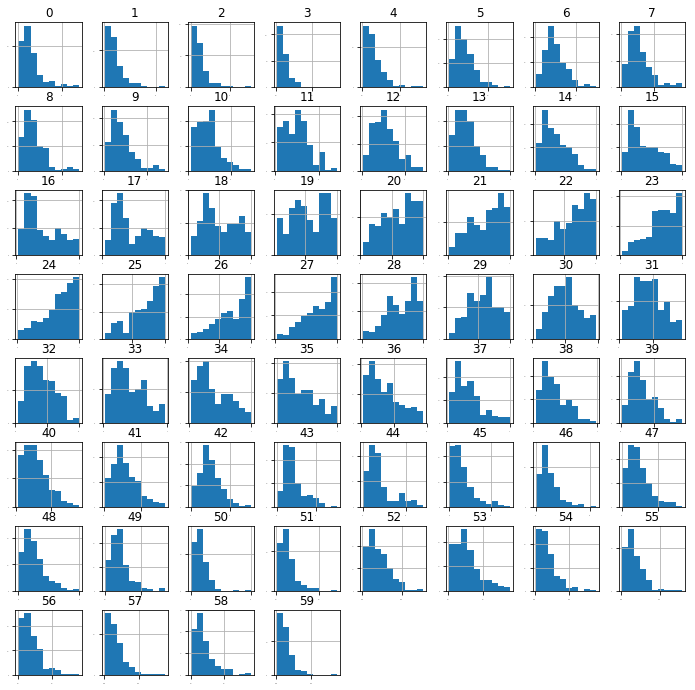

In [11]:
data.hist(figsize = (12,12), sharex = False, sharey = False, xlabelsize=1, ylabelsize=1)
pyplot.show()

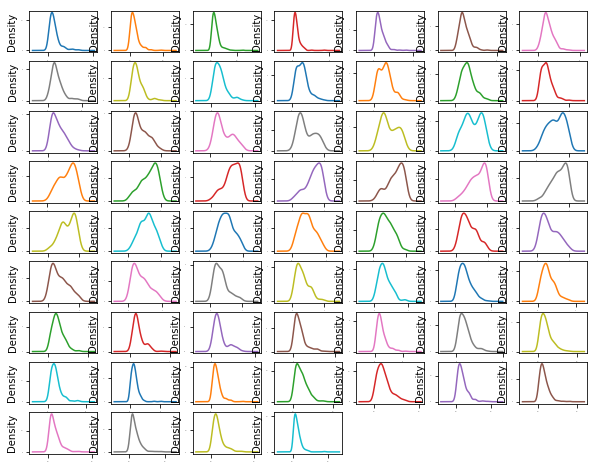

In [12]:
data.plot(kind = 'density', 
          subplots = True, 
          layout = (11,7), 
          figsize = (10,10), 
          sharex = False, 
          sharey = False, 
          legend = False,
          fontsize = 1)
pyplot.show()

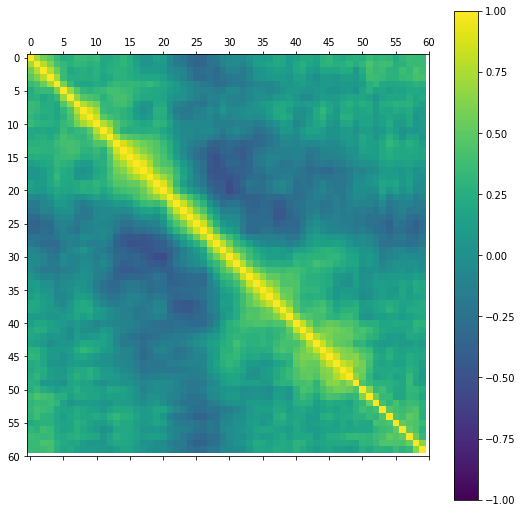

In [13]:
figure = pyplot.figure(figsize=(9, 9))
axis = figure.add_subplot(111)
graph = axis.matshow(corr, vmin = -1, vmax = 1)
figure.colorbar(graph)
ticks = np.arange(0 , len(data.columns), 5)
axis.set_xticks(ticks)
axis.set_yticks(ticks)
pyplot.show()

# Model the data

## Create validation data set

In [14]:
# Seperate X and Y values
x = data.values[:, 0:len(data.columns) - 1].astype('float')
y = data.values[:, len(data.columns) - 1]

print("x.shape = ", x.shape)
print("y.shape = ", y.shape)

# Split out validation set -- 80/20 split
seed = 10
valSize = 0.2

xTrain, xVal, yTrain, yVal = train_test_split(x, y, test_size = valSize, random_state = seed)

print("--------")
print("xTrain.shape = ", xTrain.shape)
print("yTrain.shape = ", yTrain.shape)
print("xVal.shape = ", xVal.shape)
print("yVal.shape = ", yVal.shape)

x.shape =  (208, 60)
y.shape =  (208,)
--------
xTrain.shape =  (166, 60)
yTrain.shape =  (166,)
xVal.shape =  (42, 60)
yVal.shape =  (42,)


## Build models

### Initial pass

In [15]:
# Init vars
folds = 10
seed = 10
models = []
results = {}

# Use accuracy since this is a classification
score = 'accuracy'

# Instantiate model objects
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Create a Pandas DF to hold all our spiffy results
df = DataFrame(columns = ['Model', 'Accuracy', 'StdDev'])

# Run the models
for modelName, model in models:
    # Implement K-fold cross validation where K = 10
    kFold = KFold(n_splits = folds, random_state = seed)
    results[modelName] = cross_val_score(model, xTrain, yTrain, cv = kFold, scoring = score)
    df.loc[len(df)] = list([modelName, results[modelName].mean(), results[modelName].std()])

# Print results sorted by Mean desc, StdDev asc, Model asc
df.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True])

,Model,Accuracy,StdDev
0,LR,0.7603,0.1110
1,LDA,0.7471,0.0735
2,KNN,0.7415,0.0502
3,CART,0.7114,0.0821
4,NB,0.6875,0.0999
5,SVM,0.5603,0.1074


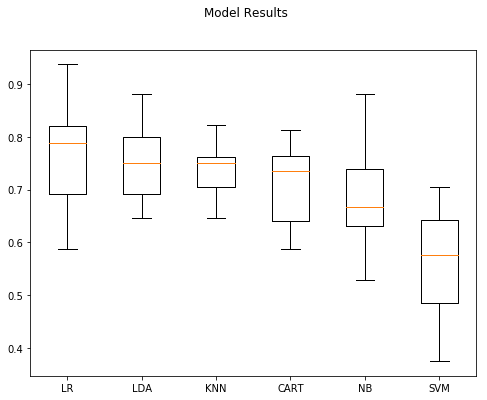

In [16]:
figure = pyplot.figure(figsize = (8,6))
figure.suptitle("Model Results")
axis = figure.add_subplot(111)
pyplot.boxplot(results.values())
axis.set_xticklabels(results.keys())
pyplot.show()

#### Data standardization

In [17]:
# Init vars and params
scaledModels = []
scaledResults = {}
scaledFolds = 10
scaledSeed = 10

# Use accuracy since this is a classification
score = 'accuracy'

# Create a Pandas DF to hold all our spiffy results
scaledDF = DataFrame(columns = ['Model', 'Accuracy', 'StdDev'])

# Setup the pipelines
pipes = []

# Create the scaled model objects
for modelName, model in models:
    pipes.append(('scaled' + modelName, Pipeline([('Scaler', StandardScaler()),(modelName, model)])))

# Run the models
for modelName, model in pipes:
    # Implement K-fold cross validation where K = 10
    kFold = KFold(n_splits = scaledFolds, random_state = scaledSeed)
    scaledResults[modelName] = cross_val_score(model, xTrain, yTrain, cv=kFold, scoring = score)
    scaledDF.loc[len(scaledDF)] = list([modelName, scaledResults[modelName].mean(), scaledResults[modelName].std()])

# Print results sorted by Mean desc, StdDev asc, Model asc
print(scaledDF.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))


        Model  Accuracy  StdDev
5   scaledSVM    0.8327  0.0666
0    scaledLR    0.8018  0.0989
2   scaledKNN    0.7890  0.1019
1   scaledLDA    0.7471  0.0735
3  scaledCART    0.7121  0.0834
4    scaledNB    0.6875  0.0999


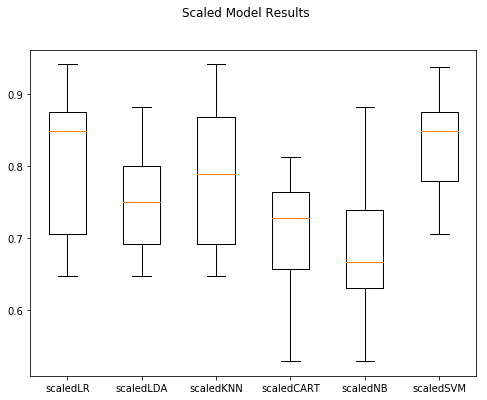

In [18]:
figure = pyplot.figure(figsize = (8,6))
figure.suptitle("Scaled Model Results")
axis = figure.add_subplot(111)
pyplot.boxplot(scaledResults.values())
axis.set_xticklabels(scaledResults.keys())

pyplot.show()

#### Model tuning helper function

In [19]:
def tuneModel(modelName, modelObj, params, returnModel = False, showSummary = True):
    # Init vars and params
    featureResults = {}
    featureFolds = 10
    featureSeed = 10

    # Use accuracy since this is a classification problem
    score = 'accuracy'

    # Create a Pandas DF to hold all our spiffy results
    featureDF = DataFrame(columns = ['Model', 'Accuracy', 'Best Params'])

    # Create feature union
    features = []
    features.append(('Scaler', StandardScaler()))
    featureUnion = FeatureUnion(features)

    # Search for the best combination of parameters
    featureResults = GridSearchCV(
        Pipeline(
            steps = [
                ('FeatureUnion', featureUnion),
                (modelName, modelObj)
        ]),
        param_grid = params,
        scoring = score,
        cv = KFold(n_splits = featureFolds, random_state = featureSeed)      
    ).fit(xTrain, yTrain)

    featureDF.loc[len(featureDF)] = list([
        modelName, 
        featureResults.best_score_,
        featureResults.best_params_,
    ])

    if showSummary:
        set_option('display.max_colwidth', -1)
        display(featureDF)
    
    if returnModel:
        return featureResults

In [66]:
def tuneModel2(modelName, modelObj, params, returnModel = False, showSummary = True):
    # Init vars and params
    featureResults = {}
    featureFolds = 10
    featureSeed = 10

    # Use accuracy since this is a classification problem
    score = 'accuracy'

    # Create a Pandas DF to hold all our spiffy results
    featureDF = DataFrame(columns = ['Model', 'Accuracy', 'Best Params'])

    # Create feature union
    features = []
    features.append(('Scaler', StandardScaler()))
    featureUnion = FeatureUnion(features)

    # Search for the best combination of parameters
    featureResults = GridSearchCV(
        Pipeline(
            steps = [
                ('FeatureUnion', featureUnion),
                (modelName, modelObj)
        ]),
        param_grid = params,
        scoring = score,
        #cv = KFold(n_splits = featureFolds, random_state = featureSeed)
    ).fit(xTrain, yTrain)

    featureDF.loc[len(featureDF)] = list([
        modelName, 
        featureResults.best_score_,
        featureResults.best_params_,
    ])

    if showSummary:
        set_option('display.max_colwidth', -1)
        display(featureDF)
    
    if returnModel:
        return featureResults

#### SVM tuning

In [69]:
modelName = "SVM"
modelObj =  SVC(C = 1.5, kernel = 'rbf')
params = {}

m1 = tuneModel(modelName, modelObj, params, True)
p1 = m1.predict(xVal)
print("accuracy_score = ", accuracy_score(yVal, p1), "\n")

,Model,Accuracy,Best Params
0,SVM,0.8675,{}


accuracy_score =  0.8333333333333334 



In [70]:
modelName = "SVM"
modelObj =  SVC(C = 1.5, kernel = 'rbf')
params = {}

m2 = tuneModel2(modelName, modelObj, params, True)
p2 = m2.predict(xVal)
print("accuracy_score = ", accuracy_score(yVal, p2), "\n")

,Model,Accuracy,Best Params
0,SVM,0.8373,{}


accuracy_score =  0.8333333333333334 



In [72]:
xsTrain = StandardScaler().fit(xTrain).transform(xTrain)
xsVal = StandardScaler().fit(xTrain).transform(xVal)

m3 =  SVC(C = 1.5, kernel = 'rbf')
m3.fit(xsTrain, yTrain)
p3 = m3.predict(xsVal)
print("accuracy_score = ", accuracy_score(yVal, p3), "\n")

accuracy_score =  0.8333333333333334 



In [73]:
print(xTrain.shape)
print(xVal.shape)

(166, 60)
(42, 60)


#### LR tuning

In [21]:
modelName = "LR"
modelObj =  LogisticRegression()
params = {
    'LR__penalty' : [ 'l1', 'l2' ],
    'LR__C' : makeRange(1, 21, 1, 0.1, 1),
}

tuneModel(modelName, modelObj, params)

,Model,Accuracy,Best Params
0,LR,0.8253,"{'LR__C': 0.1, 'LR__penalty': 'l2'}"


#### KNN tuning

In [22]:
modelName = "KNN"
modelObj =  KNeighborsClassifier()
params = {
    'KNN__n_neighbors' : makeRange(1, 26, 2, 1, 1),
    'KNN__algorithm' : [ 'auto', 'ball_tree', 'kd_tree', 'brute' ],
    'KNN__p' : [ 1, 2, 3, 4 ],   
}

tuneModel(modelName, modelObj, params)

,Model,Accuracy,Best Params
0,KNN,0.8554,"{'KNN__algorithm': 'auto', 'KNN__n_neighbors': 1, 'KNN__p': 2}"


### Initial pass - Ensemble methods

In [23]:
# Init vars and params
eModels = []
eResults = {}
eFolds = 10
eSeed = 10

# Use accuracy since this is a classification problem
eScore = 'accuracy'

# Create a Pandas DF to hold all our spiffy results
eDF = DataFrame(columns = ['Model', 'Accuracy', 'StdDev'])

# Create the scaled model objects
eModels.append(('scaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
eModels.append(('scaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
eModels.append(('scaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
eModels.append(('scaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))

# Run the models
for modelName, model in eModels:
    # Implement K-fold cross validation where K = 10
    kFold = KFold(n_splits = eFolds, random_state = eSeed)
    eResults[modelName] = cross_val_score(model, xTrain, yTrain, cv = kFold, scoring = eScore)
    eDF.loc[len(eDF)] = list([modelName, eResults[modelName].mean(), eResults[modelName].std()])

# Print results sorted by Mean desc, StdDev asc, Model asc
display(eDF.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))


,Model,Accuracy,StdDev
1,scaledGBM,0.8507,0.0809
2,scaledRF,0.7901,0.0865
3,scaledET,0.7846,0.0906
0,scaledAB,0.7831,0.0985


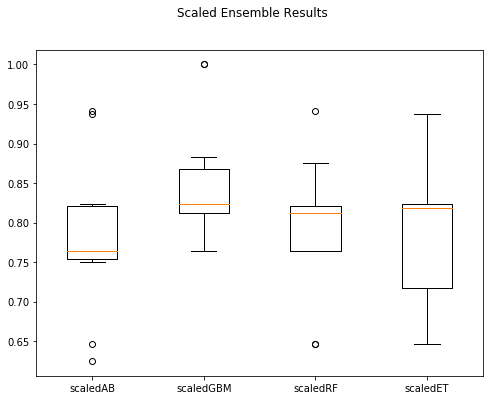

In [24]:
figure = pyplot.figure(figsize = (8,6))
figure.suptitle("Scaled Ensemble Results")
axis = figure.add_subplot(111)
pyplot.boxplot(eResults.values())
axis.set_xticklabels(eResults.keys())
pyplot.show()

#### Best model hyperparameter tuning

**Warning:  The cell below will take a LONG time to run depending on the parameters you set...**

In [25]:
modelName = "GBM"
modelObj =  GradientBoostingClassifier()
params = {
    'GBM__learning_rate' : makeRange(1, 11, 1, 0.1, 1),
    'GBM__max_depth' : makeRange(1, 11, 1, 1, 1),
    'GBM__n_estimators' : makeRange(50, 250, 50, 1, 1),
}

tuneModel(modelName, modelObj, params)

,Model,Accuracy,Best Params
0,GBM,0.8976,"{'GBM__learning_rate': 0.5, 'GBM__max_depth': 3, 'GBM__n_estimators': 200}"


## Predictions

### GBM

A note about GBM from the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html): *The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data and max_features=n_features, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, random_state has to be fixed.*

As such if you run the cell below multiple times you'll see different accuracy scores unless you set the `random_state` paremeter.  They seem to move around 0.6 to 0.8, which values near 0.6 being most common.  So, even with the variance, the GBM model does a better job on the validation data then then SVM model which is also shown below.

In [26]:
xValScaled = StandardScaler().fit(xTrain).transform(xVal)

modelName = "GBM"
modelObj =  GradientBoostingClassifier(learning_rate = 0.5, max_depth = 3, n_estimators = 50)
params = {}

bestModel = tuneModel(modelName, modelObj, params, True, False)
preds = bestModel.predict(xValScaled)


print("*************")
print("*", modelName)
print("*************\n")
print("accuracy_score = ", accuracy_score(yVal, preds), "\n")
print("confusion_matrix\n", confusion_matrix(yVal, preds), "\n")
print("classification_report\n", classification_report(yVal, preds))
print("")
print("")

*************
* GBM
*************

accuracy_score =  0.8809523809523809 

confusion_matrix
 [[13  5]
 [ 0 24]] 

classification_report
              precision    recall  f1-score   support

          M       1.00      0.72      0.84        18
          R       0.83      1.00      0.91        24

avg / total       0.90      0.88      0.88        42





### SVM

In [31]:
xValScaled = StandardScaler().fit(xTrain).transform(xVal)

modelName = "SVM"
modelObj =  SVC(C = 1.5, kernel = 'rbf')
params = {}

bestModel = tuneModel(modelName, modelObj, params, True, False)
preds = bestModel.predict(xValScaled)


print("*************")
print("*", modelName)
print("*************\n")
print("accuracy_score = ", accuracy_score(yVal, preds), "\n")
print("confusion_matrix\n", confusion_matrix(yVal, preds), "\n")
print("classification_report\n", classification_report(yVal, preds))
print("")
print("")

*************
* SVM
*************

accuracy_score =  0.42857142857142855 

confusion_matrix
 [[18  0]
 [24  0]] 

classification_report
              precision    recall  f1-score   support

          M       0.43      1.00      0.60        18
          R       0.00      0.00      0.00        24

avg / total       0.18      0.43      0.26        42





In [32]:
xValScaled = StandardScaler().fit(xTrain).transform(xVal)

modelName = "SVM"
modelObj =  SVC(C = 1.5, kernel = 'rbf')
params = {}

bestModel = tuneModel2(modelName, modelObj, params, True, False)
preds = bestModel.predict(xValScaled)


print("*************")
print("*", modelName)
print("*************\n")
print("accuracy_score = ", accuracy_score(yVal, preds), "\n")
print("confusion_matrix\n", confusion_matrix(yVal, preds), "\n")
print("classification_report\n", classification_report(yVal, preds))
print("")
print("")

*************
* SVM
*************

accuracy_score =  0.42857142857142855 

confusion_matrix
 [[18  0]
 [24  0]] 

classification_report
              precision    recall  f1-score   support

          M       0.43      1.00      0.60        18
          R       0.00      0.00      0.00        24

avg / total       0.18      0.43      0.26        42



